In [1]:
!python -m venv projectvenv


In [2]:
# pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [3]:
import tensorflow as tf
import os
import shutil as shutil

In [76]:
gpus = tf.config.experimental.list_physical_devices('GPU')


In [77]:
gpus

[]

In [78]:
print("GPU Available:", tf.config.list_physical_devices('GPU'))

# Check TensorFlow version
print("TensorFlow Version:", tf.__version__)

GPU Available: []
TensorFlow Version: 2.16.1


In [6]:
# source_dir = r'C:\Users\User\Desktop\MAC0460-ML\data\output'

# # Define the list of polygon types (keywords to look for in filenames)
# polygons = ['Circle', 'Square', 'Triangle', 'Pentagon', 'Hexagon', 'Star', 'Octagon', 'Nonagon', 'Heptagon']

In [7]:
# for polygon in polygons:
#     polygon_dir = os.path.join(source_dir, polygon)
#     if not os.path.exists(polygon_dir):
#         os.makedirs(polygon_dir)
#         #Criação de diretórios para cada uma das formas geométricas. Isso facilita a label da test data

In [8]:
# for filename in os.listdir(source_dir):
#     # Check if the file is an image by looking for polygon keywords in the filename
#     for polygon in polygons:
#         print(polygon, filename.lower())
        
#         if polygon.lower() in filename.lower() and polygon != filename:
#             # Construct the source and destination file paths
#             src_path = os.path.join(source_dir, filename)
#             dest_path = os.path.join(source_dir, polygon, filename)
#             # Move the file to the appropriate directory
#             shutil.move(src_path, dest_path)
#             break  # Move to the next file once the current file is processed

In [9]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [10]:
import cv2 
from matplotlib import pyplot as plt
import imghdr

In [11]:
img = cv2.imread(os.path.join('data', 'Circle', 'Circle_0a4d8928-2a9a-11ea-8123-8363a7ec19e6.png'))

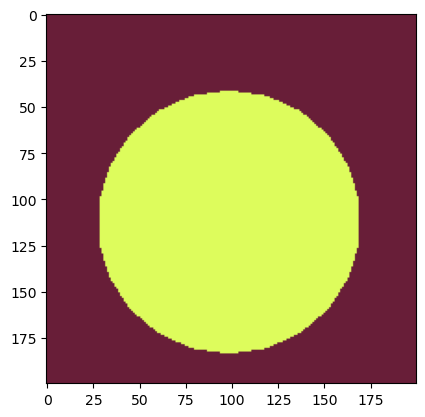

In [12]:
plt.imshow(img)

In [13]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None) -> 'DatasetV2'>

In [14]:
import numpy as np

In [15]:
data = tf.keras.utils.image_dataset_from_directory('data', image_size=(200,200)) 
#Prepara os dados com suas respectivas labels 

Found 47651 files belonging to 9 classes.


In [16]:
data_iterator = data.as_numpy_iterator() #--> data generator

In [17]:
batch = data_iterator.next()

In [18]:
batch[0].shape #representacao de imagens como np arrays

(32, 200, 200, 3)

In [19]:
batch[1]

array([3, 3, 4, 5, 4, 0, 4, 4, 0, 6, 4, 3, 6, 4, 3, 6, 7, 5, 1, 0, 7, 2,
       7, 2, 2, 4, 6, 5, 5, 1, 2, 2])

In [20]:
# Circulo : 0
# Heptagon : 1
# Hexagon: 2
# Nonagon: 3
# Octagon: 4
# Pentagon: 5
# Square: 6
# Star: 7
# Triangle : 8

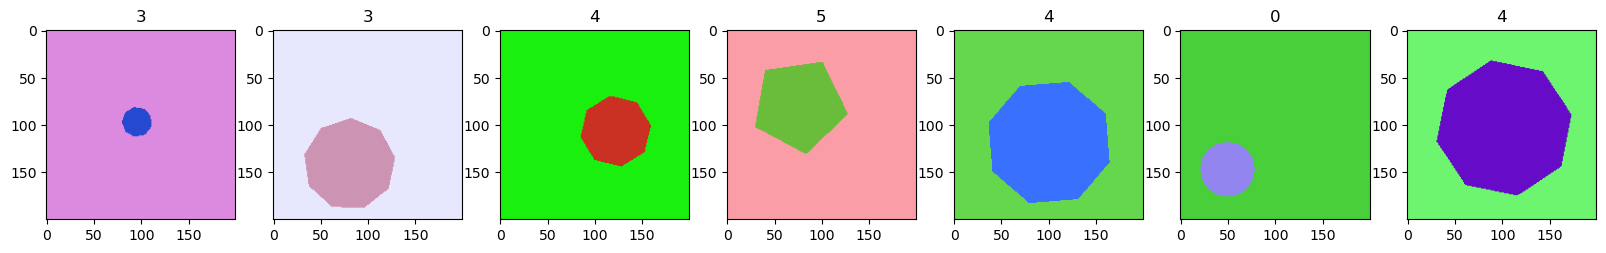

In [21]:

fig, ax = plt.subplots(ncols=7, figsize=(20,20))
for idx, img in enumerate(batch[0][:7]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [22]:
batch[0].max()

254.0

In [23]:
data = data.map(lambda x,y: (x/255, y))

In [24]:
data.as_numpy_iterator().next()[0].min()

0.0

In [25]:
scaled_iterator = data.as_numpy_iterator()

In [26]:
batch = scaled_iterator.next()

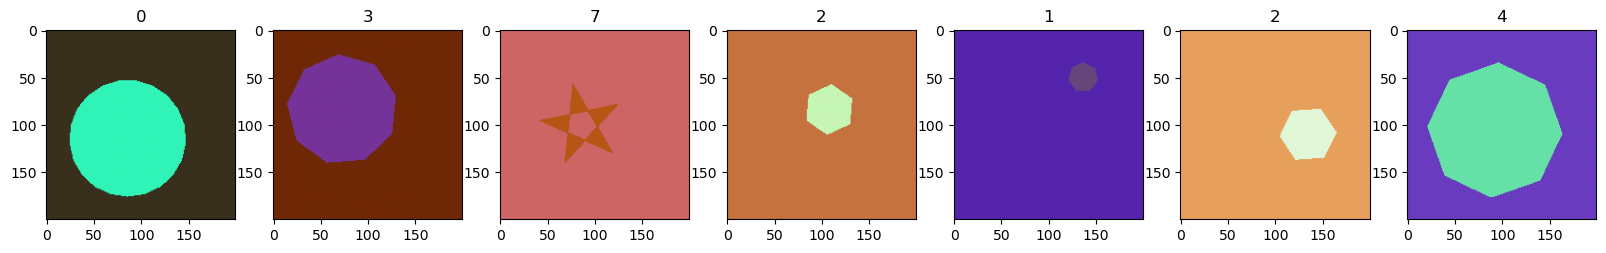

In [27]:
fig, ax = plt.subplots(ncols=7, figsize=(20,20))
for idx, img in enumerate(batch[0][:7]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [28]:


len(data)

1490

In [29]:
train_size = int(len(data)*0.7) #70% dos dados para treinamento do modelo
val_size = int(len(data)*0.2) #20% dos dados para validação do modelo
test_size = int(len(data)*0.1) #10% dos dados para teste do modelo

In [30]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [31]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input

In [32]:
model = Sequential()

In [33]:
for batch in train:
    print("Training batch shape:", batch[0].shape)  # Assuming batch[0] contains input data
    print("Training batch labels shape:", batch[1].shape)  # Assuming batch[1] contains labels
    break  # Stop after inspecting the first batch


for batch in val:
    print("Training batch shape:", batch[0].shape)  # Assuming batch[0] contains input data
    print("Training batch labels shape:", batch[1].shape)  # Assuming batch[1] contains labels
    break  # Stop after inspecting the first batch

Training batch shape: (32, 200, 200, 3)
Training batch labels shape: (32,)
Training batch shape: (32, 200, 200, 3)
Training batch labels shape: (32,)


In [34]:
model.add(Input(shape=(200, 200, 3)))


model.add(Conv2D(16, (3,3), 1, activation='relu'))

model.add(MaxPooling2D())


model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(9, activation='softmax'))


In [35]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8464)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,167,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         2,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,179,065 (8.31 MB)

 Trainable params: 2,179,065 (8.31 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, validation_data=val, epochs=10, callbacks=[tensorboard_callback])

Epoch 1/10
1043/1043 ━━━━━━━━━━━━━━━━━━━━ 253s 241ms/step - accuracy: 0.1553 - loss: 2.1275 - val_accuracy: 0.3775 - val_loss: 1.5863
Epoch 2/10
1043/1043 ━━━━━━━━━━━━━━━━━━━━ 228s 218ms/step - accuracy: 0.4300 - loss: 1.4485 - val_accuracy: 0.5565 - val_loss: 1.1554
Epoch 3/10
1043/1043 ━━━━━━━━━━━━━━━━━━━━ 220s 210ms/step - accuracy: 0.6294 - loss: 0.9544 - val_accuracy: 0.6509 - val_loss: 0.9429
Epoch 4/10
1043/1043 ━━━━━━━━━━━━━━━━━━━━ 217s 208ms/step - accuracy: 0.7659 - loss: 0.6230 - val_accuracy: 0.7250 - val_loss: 0.8424
Epoch 5/10
1043/1043 ━━━━━━━━━━━━━━━━━━━━ 213s 204ms/step - accuracy: 0.8496 - loss: 0.4081 - val_accuracy: 0.7494 - val_loss: 0.8533
Epoch 6/10
1043/1043 ━━━━━━━━━━━━━━━━━━━━ 210s 201ms/step - accuracy: 0.9003 - loss: 0.2735 - val_accuracy: 0.7556 - val_loss: 0.9409
Epoch 7/10
1043/1043 ━━━━━━━━━━━━━━━━━━━━ 208s 199ms/step - accuracy: 0.9312 - loss: 0.2013 - val_accuracy: 0.7639 - val_loss: 1.0572
Epoch 8/10
1043/1043 ━━━━━━━━━━━━━━━━━━━━ 209s 201ms/step - ac

In [38]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [39]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [46]:
for batch in test.as_numpy_iterator():
    print("Test batch shape:", batch[0].shape)  # Assuming batch[0] contains input data
    print("Test batch labels shape:", batch[1].shape)  # Assuming batch[1] contains labels
    print(batch[1])
    break  # Stop after inspecting the first batch

Test batch shape: (32, 200, 200, 3)
Test batch labels shape: (32,)
[8 8 5 0 1 1 2 2 5 0 0 3 4 6 2 6 3 3 0 3 1 0 1 1 2 3 2 4 1 4 3 2]


In [51]:
for batch in test.as_numpy_iterator():
    X, y = batch
    print(y)
    yhat = model.predict(X)
    predicted_classes = np.argmax(yhat, axis=1)
    print(predicted_classes)
    pre.update_state(y, predicted_classes)
    re.update_state(y, predicted_classes)
    acc.update_state(y, predicted_classes)

[5 3 6 1 8 4 3 0 8 7 5 3 8 4 7 2 4 3 4 4 6 0 8 0 3 3 3 7 6 2 0 6]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
[5 3 6 5 8 4 1 0 5 7 5 5 8 3 7 5 4 3 1 4 6 4 8 0 5 4 1 6 2 2 0 6]
[0 4 2 7 7 6 7 3 5 2 4 5 0 0 1 0 3 1 4 8 6 6 6 2 7 0 4 2 3 7 0 5]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
[0 4 2 7 7 6 7 3 5 2 6 5 0 0 4 0 1 1 5 0 5 6 6 2 6 4 4 2 3 7 3 5]
[6 3 0 4 2 6 4 1 8 8 8 3 7 3 2 1 1 7 2 5 7 8 4 4 7 6 3 6 0 8 6 3]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
[6 3 3 4 2 3 4 1 8 8 8 0 6 3 2 1 1 7 5 5 7 8 4 4 7 2 0 6 0 8 6 0]
[0 8 1 3 4 7 5 6 1 6 7 4 5 4 1 4 5 3 2 3 4 3 1 8 2 6 8 8 6 1 2 5]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
[0 4 0 3 4 7 5 6 4 2 7 4 2 4 1 4 5 3 2 0 4 1 1 8 2 5 8 8 6 1 6 5]
[6 5 0 8 0 5 4 2 1 6 6 1 6 1 6 5 7 2 0 1 4 8 2 3 5 8 8 0 5 2 6 7]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
[6 5 0 8 0 5 4 2 1 6 6 1 6 3 6 5 7 2 0 1 2 8 2 3 5 8 8 8 1 2 6 7]
[4 6 5 1 4 2 7 1 7 5 6 0 2 8 7 2 2 3 3 8 2 4 2 3 1 7 1 5 3 3 8 4]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
[4 6 5 1 4 2 7 1 7 4 6 1 2 8 8 1 5 3 3 8 2 4 2

In [52]:
print("Precision:", pre.result().numpy())
print("Recall:", re.result().numpy())
print("Accuracy:", acc.result().numpy())

Precision: 0.9695881
Recall: 0.9642772
Accuracy: 0.18959731


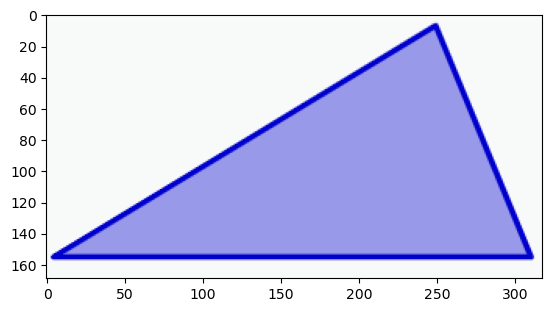

In [53]:
img = cv2.imread('triangulo-escaleno-1.png')
plt.imshow(img)
plt.show()

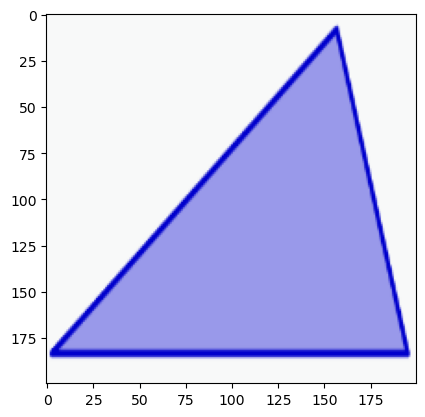

In [62]:
img = tf.image.resize(img, (200,200))
resized_img = img.numpy().astype(int)
plt.imshow(resized_img)

In [63]:
preprocessed_img = resized_img / 255.0  # Normalize pixel values (assuming pixel values are in the range [0, 255])
preprocessed_img = preprocessed_img.reshape(1, 200, 200, 3)

In [73]:
predictions = model.predict(preprocessed_img)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[2.9730510e-11 5.7017728e-06 1.4450653e-01 1.2123549e-07 8.5548764e-01
  1.0919731e-27 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


In [75]:
preprocessed_img.min()

0.0

In [71]:
predicted_class = np.argmax(predictions)
print(predicted_class)

4
